## Importing Neccesary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Loading the Dataset

In [24]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## dropping uneccesary coloumn 

In [26]:
df.drop('region', axis=1)

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


## Simple Linear Regression ( BMI vs Charges)

defining variables

In [48]:
X = df[["bmi"]]
y= df["charges"]

In [50]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

### Evaluation Metric R2 Score

In [54]:
y_predict = model.predict(X_test)
r2 = r2_score(y_test, y_predict)
r2

0.03970193117941878

## Plotting the Best Fit Line

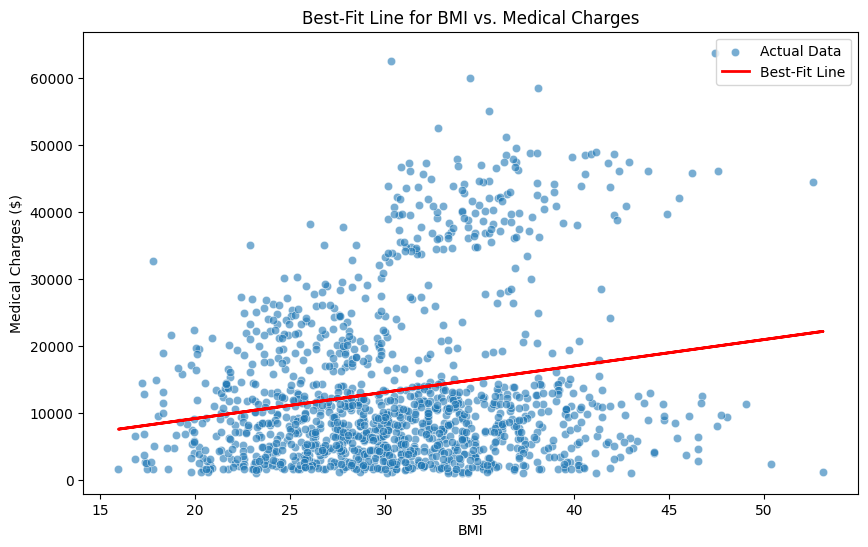

In [68]:
# This will create a 'y_predictions_full' array with 1338 values
y_predictions_full = model.predict(X)

# 6. Create the plot
plt.figure(figsize=(10, 6))

# Plot the original data points (all 1338 of them)
sns.scatterplot(x='bmi', y='charges', data=df, alpha=0.6, label='Actual Data')

# Plot the best-fit line using the full set of predictions
plt.plot(df['bmi'], y_predictions_full, color='red', linewidth=2, label='Best-Fit Line')

# Add titles and labels for clarity
plt.title('Best-Fit Line for BMI vs. Medical Charges')
plt.xlabel('BMI')
plt.ylabel('Medical Charges ($)')
plt.legend()
plt.show()

# Multiple Linear Regression ( age, sex,smoker ,gender vs charges)

In [121]:
df_multi = pd.read_csv("insurance.csv")
df_multi

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [123]:
df_multi = df_multi.drop("region",axis=1)
df_multi

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


## Custom encoding children 
so that it will be easy 

In [125]:
# Where 'children' is greater than 3, set it to 4.
df_multi.loc[df_multi['children'] > 3, 'children'] = 4
# Let's check the new values
print("Value counts for 'children' after custom encoding:")
print(df_multi['children'].unique())

Value counts for 'children' after custom encoding:
[0 1 3 2 4]


## One-Hot Encoding for sex and smoker coloumn

In [127]:
df_multi = pd.get_dummies(df_multi, columns=['sex', 'smoker'], drop_first=True)
df_multi

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False
1334,18,31.920,0,2205.98080,False,False
1335,18,36.850,0,1629.83350,False,False
1336,21,25.800,0,2007.94500,False,False


In [129]:

X = df_multi.drop('charges', axis=1)
y = df_multi['charges']


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## R2 score for Multilinear regression

In [145]:
y_pred = multi_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2


0.7813070588825417

In [149]:
coefficients = pd.DataFrame(multi_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients.sort_values('Coefficient', ascending=False))

             Coefficient
smoker_yes  23646.802433
children      453.780308
bmi           327.334291
age           256.831925
sex_male       -6.429191


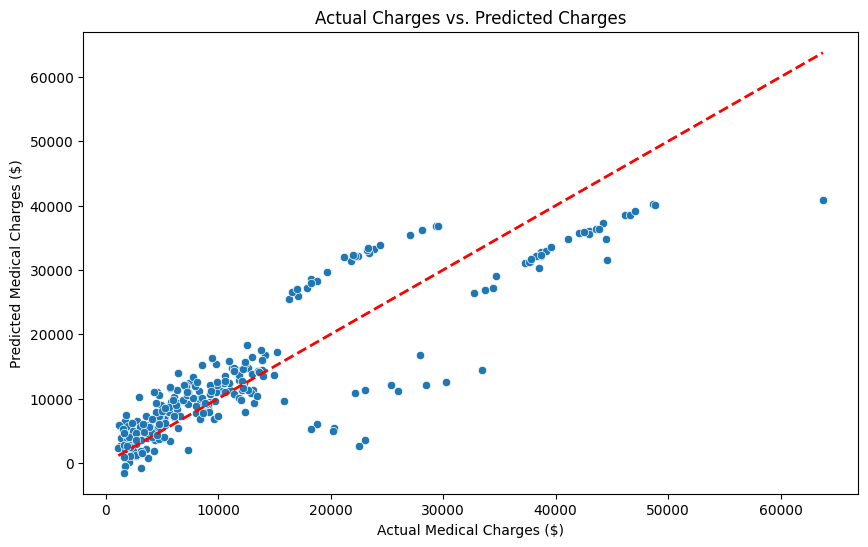

In [159]:
# 3. Make predictions on the test set
y_pred_full = multi_model.predict(X_test)
# 4. Create the "Actual vs. Predicted" plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_full)
plt.title('Actual Charges vs. Predicted Charges')
plt.xlabel('Actual Medical Charges ($)')
plt.ylabel('Predicted Medical Charges ($)')

# Add the "perfect prediction" line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.show()

## Polynomial Regression to improve the effeciency of model

In [165]:
from sklearn.preprocessing import PolynomialFeatures


# 1. Create polynomial features (degree=2 creates squared terms like age^2, bmi^2, etc.)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)



Original Multiple Regression R-squared: 0.7813
Polynomial Regression R-squared: 0.8669


In [167]:
# 2. Train a new model on these polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [171]:
# 3. Evaluate the new model
y_pred_poly = poly_model.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [177]:

print(f"Polynomial Regression R-squared: {r2_poly:.4f}")

Polynomial Regression R-squared: 0.8669


In [181]:

coefficients = pd.DataFrame(multi_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients.sort_values('Coefficient', ascending=False))

             Coefficient
smoker_yes  23646.802433
children      453.780308
bmi           327.334291
age           256.831925
sex_male       -6.429191
